# SVM with Linear Kernel

## Theoretical Approach
In this notebook, we implement a Support Vector Machine (SVM) to classify linearly separable data. The dataset consists of two distinct clusters of points that can be separated by a straight line.

The goal is to find the optimal hyperplane that separates the two classes with the maximum margin. In a 2-dimensional space, this hyperplane takes the form of a line:

$$
\mathbf{w}^T \mathbf{x} + b = 0
$$

## Mathematical Formulation

We minimize the squared norm of the weight vector $\mathbf{w}$ to maximize the geometric margin, subject to the constraint that all training samples are classified correctly.

### Primal Problem
$$
\min_{\mathbf{w}, b} \frac{1}{2} ||\mathbf{w}||^2
$$

Subject to:
$$
y_i (\mathbf{w}^T \mathbf{x}_i + b) \geq 1, \quad \forall i
$$

### Dual Problem
To solve this efficiently, we switch to the Dual Formulation using Lagrange multipliers $\alpha$. Unlike the non-linear case where we map data to higher dimensions using kernels, here we simply use the dot product of the original vectors.

$$
\max_{\alpha} \sum_{i=1}^N \alpha_i - \frac{1}{2} \sum_{i=1}^N \sum_{j=1}^N \alpha_i \alpha_j y_i y_j (\mathbf{x}_i \cdot \mathbf{x}_j)
$$

Subject to:
$$
\sum_{i=1}^N \alpha_i y_i = 0, \quad 0 \leq \alpha_i \leq C
$$

The solution $\alpha$ identifies the **Support Vectors**, which are the data points lying exactly on the margin boundaries.

### Libraries Import

In [1]:
import matplotlib.pyplot as plt
from sklearn import svm
import pandas as pd
import numpy as np

### Data Generation

In [2]:
# Running generation script
%run linear_data_generation.py

# Loading data from CSV
data = pd.read_csv('data_linear.csv')

# Extracting features and labels
X = data[['x1', 'x2']].values
y = data['label'].values

Success: data_linear.csv generated.


### Raw Data Visualization

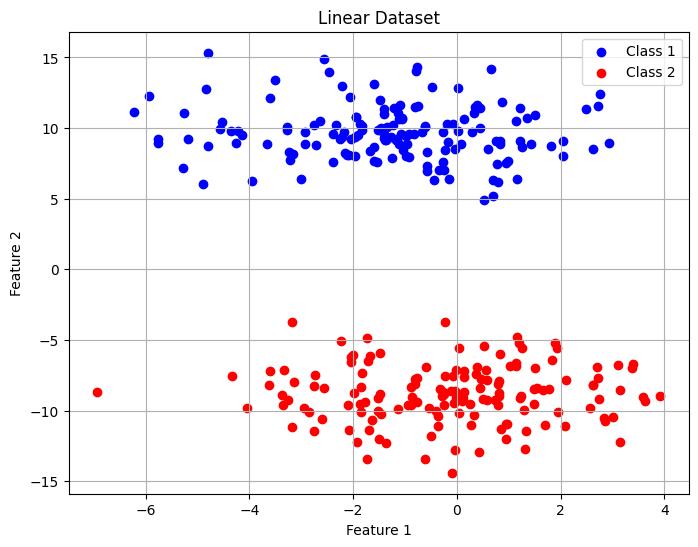

In [3]:
# Visualizing the raw data
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color="blue", label="Class 1")
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color="red", label="Class 2")
plt.title("Linear Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

### Model Implementation

In [4]:
# Initialize SVM with Linear Kernel
clf = svm.SVC(kernel='linear', C=1.0)

# Fit the model
clf.fit(X, y)

print("Optimization Complete.")
print(f"Support Vectors Found: {len(clf.support_)}")

Optimization Complete.
Support Vectors Found: 2


### Decision Boundary Visualization

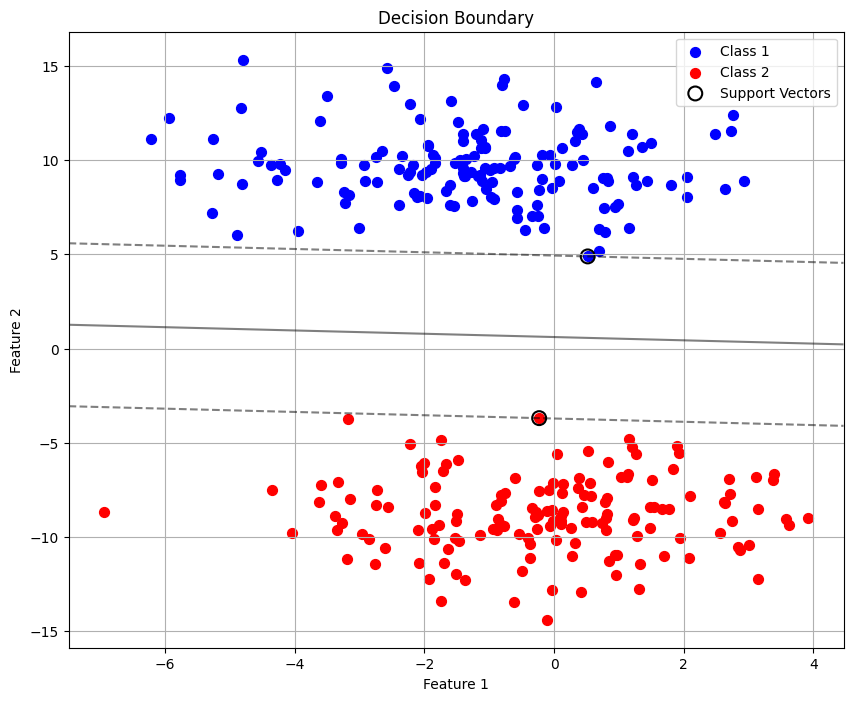

In [5]:
plt.figure(figsize=(10, 8))

# Scatter plot of the data
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color="blue", s=50, label="Class 1")
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color="red", s=50, label="Class 2")

# Axis limits
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Creating grid
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

Z = clf.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# Highlighting support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1.5, facecolors='none', edgecolors='k', label='Support Vectors')

plt.title("Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(loc='upper right')
plt.grid(True)
plt.show()